In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/titanic_train.csv')

In [4]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable descriptions
- **pclass**: A proxy for socio-economic status (SES, i.e. upper, middle, lower): 1st/2nd/3rd
- **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- **SibSp** (sibling/spouse)
- **Parch** (parent/child) The dataset defines family relations in this way
- **Cabin** has nan values, but 148 unique values like C85, C123 etc.
- **Ticket** has 681 unique values

### Peeking into the data

What is happening in columns like Ticket, Cabin etc.?

Ticket unique vals: 681


<Axes: >

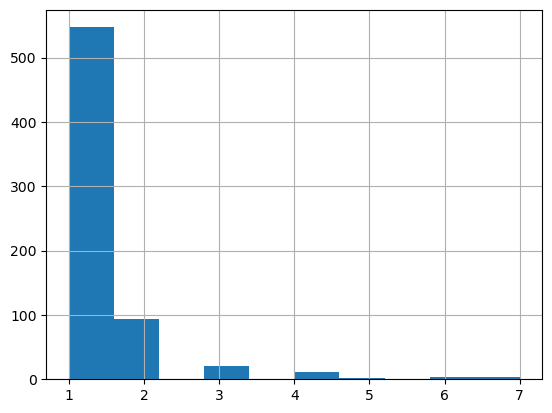

In [14]:
# this is kind of very important -- your cabin determines whether you were able to get out or not
print('Ticket unique vals:', len(df['Ticket'].unique()))
df['Ticket'].value_counts().hist()

# a vast majority of tickets seem to be unique, but ~100 are also in pairs, could be useful

In [29]:
print(df['Cabin'].unique())
print('High level types:', set([c[0] if type(c) == str else None for c in df['Cabin']]))

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
High level types: {'G', 'E', 'D', 'C', 'B',

### Preprocessing needed on the columns
- Ticket can basically indicate whether ticket was single or group — perhaps important in predicting whether you were moving in a large vs. small group as it could affect your survival chances
- Since not enough data points to draw patterns, I'll simplify cabin to first letter

In [54]:
# pull out unique cabin types
unique_cabin_types = list(set([c[0] for c in df['Cabin'] if isinstance(c, str)]))
def map_cabin_type(cabin_val):
    if pd.isna(cabin_val):
        return 0
    else:
        firstchar = cabin_val[0]
        return unique_cabin_types.index(firstchar)+1
    
df['cabin_types'] = df['Cabin'].apply(map_cabin_type)

# very few actually have a non-null (non-zero) cabin type